# Chirag Rao K V
### Reg no: 240962180
### Sec: P C 
### Roll no: 66

## Week 9 and 10

In [424]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [425]:
df = pd.read_csv("transaction_data.csv")
df

,Transaction ID,Sender Account ID,Receiver Account ID,Transaction Amount,Transaction Type,Timestamp,Transaction Status,Fraud Flag,Geolocation (Latitude/Longitude),Device Used
0,TXN9520068950,ACC14994,ACC16656,495.90,Deposit,1/17/2025 10:14,Failed,True,"34.0522 N, -74.006 W",Desktop
1,TXN9412011085,ACC58958,ACC32826,529.62,Withdrawal,1/17/2025 10:51,Success,False,"35.6895 N, -118.2437 W",Mobile
2,TXN4407425052,ACC56321,ACC92481,862.47,Withdrawal,1/17/2025 10:50,Failed,False,"48.8566 N, 2.3522 W",Mobile
3,TXN2214150284,ACC48650,ACC76457,1129.88,Transfer,1/17/2025 10:56,Success,True,"34.0522 N, -74.006 W",Mobile
4,TXN4247571145,ACC60921,ACC11419,933.24,Deposit,1/17/2025 10:25,Success,True,"55.7558 N, 37.6173 W",Mobile
...,...,...,...,...,...,...,...,...,...,...
995,TXN7395336359,ACC79886,ACC14903,1340.76,Transfer,1/17/2025 10:49,Success,False,"35.6895 N, -118.2437 W",Mobile
996,TXN2215717837,ACC95972,ACC50750,483.36,Withdrawal,1/17/2025 11:00,Failed,True,"55.7558 N, 37.6173 W",Mobile
997,TXN1676848215,ACC95938,ACC18507,199.81,Withdrawal,1/17/2025 10:54,Success,False,"34.0522 N, 139.6917 W",Desktop
998,TXN2479413280,ACC76523,ACC95234,1341.86,Transfer,1/17/2025 10:59,Success,True,"51.5074 N, 139.6917 W",Mobile


In [426]:
for i in df.columns:
    print(i)

Transaction ID
Sender Account ID
Receiver Account ID
Transaction Amount
Transaction Type
Timestamp
Transaction Status
Fraud Flag
Geolocation (Latitude/Longitude)
Device Used


In [427]:
df.describe()

,Transaction Amount
count,1000.00000
mean,771.16529
std,411.01925
min,51.89000
25%,423.34750
50%,761.65500
75%,1122.67250
max,1497.76000


After checking for nan values, we find there are no nan values so we can proceed to check for duplicates.

In [428]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Transaction ID                    1000 non-null   object 
 1   Sender Account ID                 1000 non-null   object 
 2   Receiver Account ID               1000 non-null   object 
 3   Transaction Amount                1000 non-null   float64
 4   Transaction Type                  1000 non-null   object 
 5   Timestamp                         1000 non-null   object 
 6   Transaction Status                1000 non-null   object 
 7   Fraud Flag                        1000 non-null   bool   
 8   Geolocation (Latitude/Longitude)  1000 non-null   object 
 9   Device Used                       1000 non-null   object 
dtypes: bool(1), float64(1), object(8)
memory usage: 71.4+ KB


In [429]:

df.isna().sum()

Transaction ID                      0
Sender Account ID                   0
Receiver Account ID                 0
Transaction Amount                  0
Transaction Type                    0
Timestamp                           0
Transaction Status                  0
Fraud Flag                          0
Geolocation (Latitude/Longitude)    0
Device Used                         0
dtype: int64

There are no duplicates as no columns were dropped, So we can proceed to visualise the data.

In [430]:
df = df.drop_duplicates()
df.shape

(1000, 10)

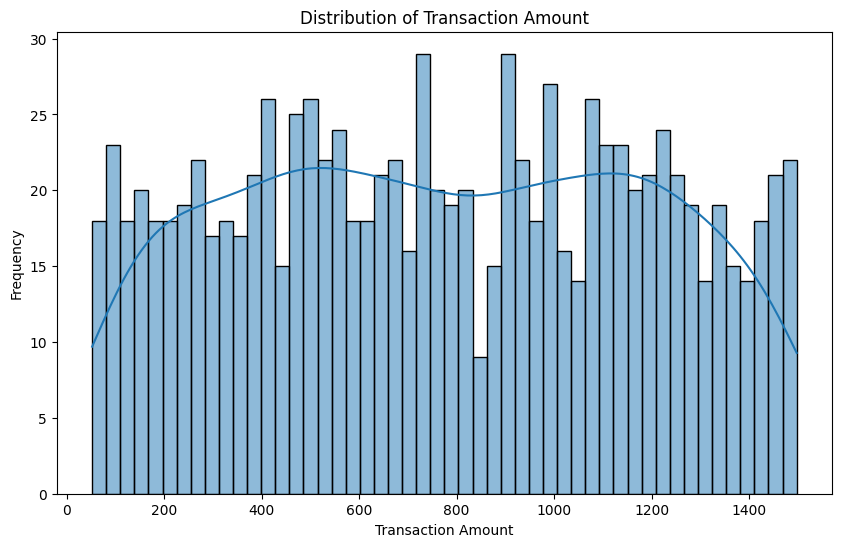

In [431]:
plt.figure(figsize=(10,6))
sns.histplot(df['Transaction Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

C:\Users\chira\AppData\Local\Temp\ipykernel_23116\3031533603.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y ="Transaction Amount",x="Transaction ID",data = tr,palette="coolwarm")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'TXN1696527060'),
  Text(1, 0, 'TXN8741905833'),
  Text(2, 0, 'TXN4979176158'),
  Text(3, 0, 'TXN7486103501'),
  Text(4, 0, 'TXN4433757533'),
  Text(5, 0, 'TXN8552007460'),
  Text(6, 0, 'TXN9255711120'),
  Text(7, 0, 'TXN7347670619'),
  Text(8, 0, 'TXN4930471112'),
  Text(9, 0, 'TXN9960780796'),
  Text(10, 0, 'TXN1937189886'),
  Text(11, 0, 'TXN6617448958'),
  Text(12, 0, 'TXN7255939236'),
  Text(13, 0, 'TXN2617645101'),
  Text(14, 0, 'TXN9297678665')])

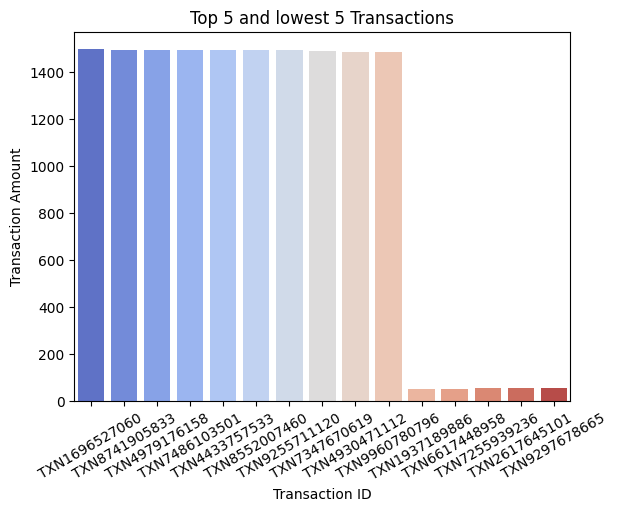

In [432]:
# visualising transactions
highest_transaction = df.nlargest(10,"Transaction Amount")
smallest_transaction = df.nsmallest(5,"Transaction Amount")
tr = pd.concat([highest_transaction,smallest_transaction],axis= 0,ignore_index= True)
sns.barplot(y ="Transaction Amount",x="Transaction ID",data = tr,palette="coolwarm")
plt.title("Top 5 and lowest 5 Transactions")
plt.xticks(rotation = 30)

In [433]:
type_df = df["Transaction Type"].value_counts()
type_df  = type_df.reset_index()
type_df

,Transaction Type,count
0,Transfer,374
1,Deposit,316
2,Withdrawal,310


Text(0.5, 1.0, 'Type of Transaction')

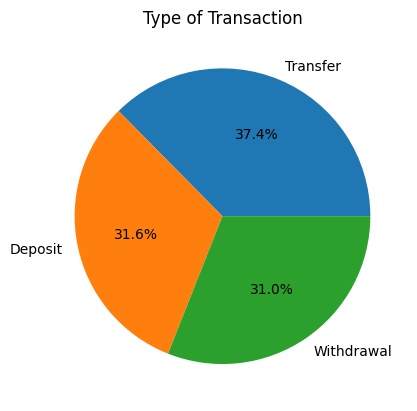

In [434]:
plt.pie(type_df["count"],labels=type_df["Transaction Type"],autopct="%1.1f%%")
plt.title("Type of Transaction")

In [435]:
data_type = df.groupby("Transaction Type")["Transaction Amount"].sum()
data_type = data_type.reset_index()
data_type


,Transaction Type,Transaction Amount
0,Deposit,252042.62
1,Transfer,291776.55
2,Withdrawal,227346.12


Text(0, 0.5, 'Total amount')

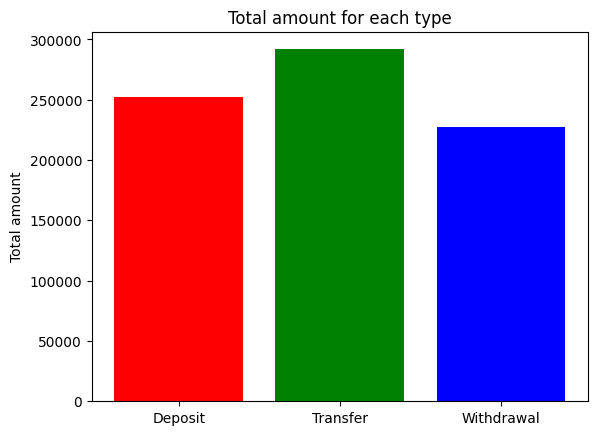

In [436]:
plt.bar(data_type["Transaction Type"],data_type["Transaction Amount"],color = ["red","green","blue"])
plt.title("Total amount for each type")
plt.ylabel("Total amount")

C:\Users\chira\AppData\Local\Temp\ipykernel_23116\3796824812.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data= df,x = "Transaction Type",y="Transaction Amount",palette="coolwarm")


Text(0.5, 1.0, 'MaxMin Amount in Types')

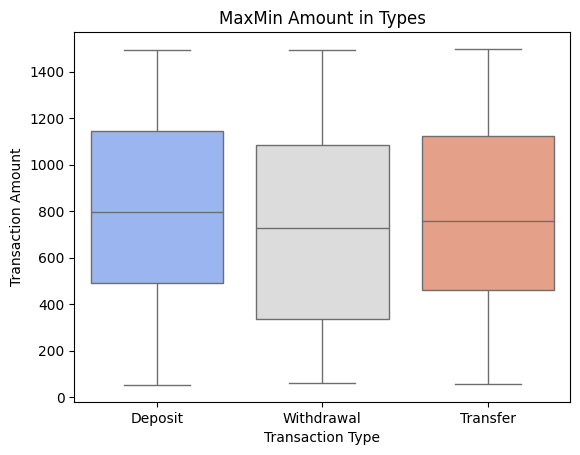

In [437]:
sns.boxplot(data= df,x = "Transaction Type",y="Transaction Amount",palette="coolwarm")
plt.title("MaxMin Amount in Types")

In [438]:
device_df = df["Device Used"].value_counts()
device_df = device_df.reset_index()
device_df

,Device Used,count
0,Mobile,521
1,Desktop,479


Text(0.5, 1.0, 'Device used for transaction')

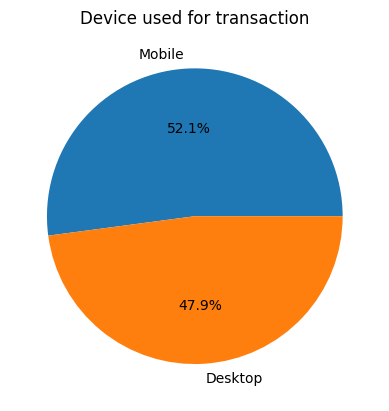

In [439]:
plt.pie(device_df["count"],labels=device_df["Device Used"],autopct="%1.1f%%")
plt.title("Device used for transaction")

Text(0.5, 1.0, 'Device vs success')

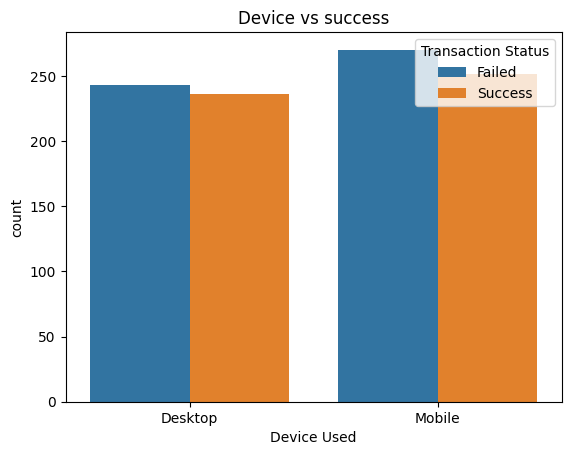

In [440]:
sns.countplot(data=df,x ="Device Used",hue = "Transaction Status")
plt.title("Device vs success")

In [441]:
df["Fraud Flag"].value_counts()

Fraud Flag
False    519
True     481
Name: count, dtype: int64

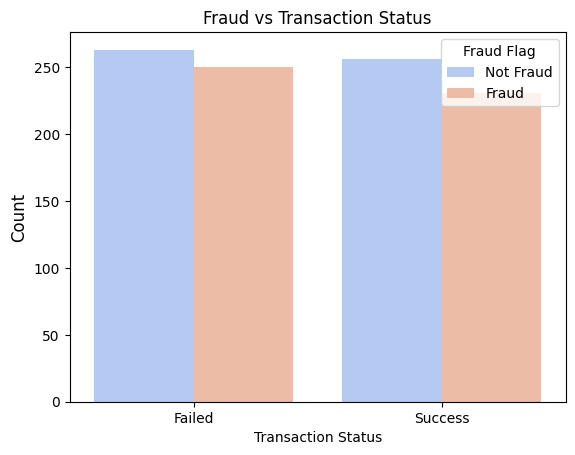

In [442]:
sns.countplot(data=df, x="Transaction Status", hue="Fraud Flag", palette="coolwarm")
plt.title("Fraud vs Transaction Status")
plt.xlabel("Transaction Status")
plt.ylabel("Count", fontsize=12)
plt.legend(title="Fraud Flag", labels=["Not Fraud", "Fraud"])
plt.show()

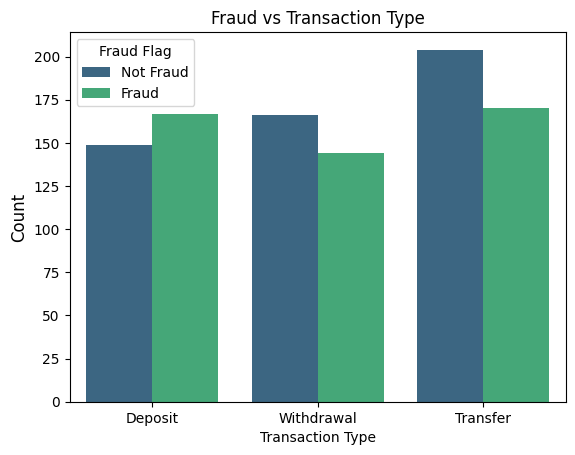

In [443]:
sns.countplot(data=df, x="Transaction Type", hue="Fraud Flag", palette="viridis")
plt.title("Fraud vs Transaction Type")
plt.xlabel("Transaction Type")
plt.ylabel("Count", fontsize=12)
plt.legend(title="Fraud Flag", labels=["Not Fraud", "Fraud"])
plt.show()

In [444]:
fraud_location = df[df["Fraud Flag"] == True]["Geolocation (Latitude/Longitude)"].value_counts()
fraud_location = fraud_location.reset_index().nlargest(10,"count")

C:\Users\chira\AppData\Local\Temp\ipykernel_23116\1143493026.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Geolocation (Latitude/Longitude)", y = "count",data= fraud_location,palette="viridis")


Text(0.5, 1.0, 'Locations and fraud transaction count')

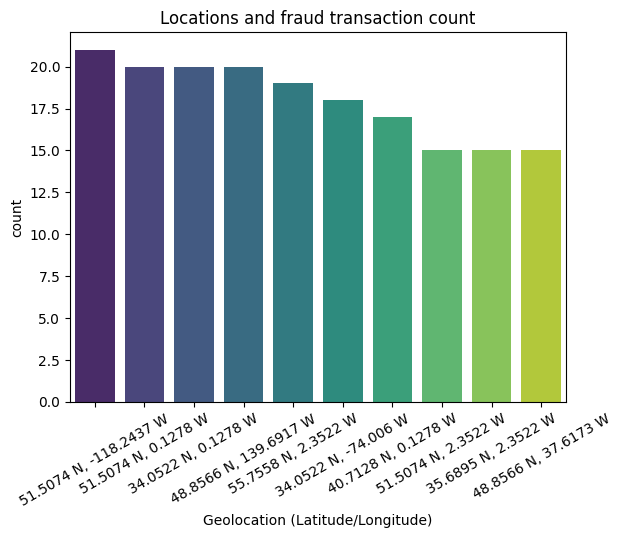

In [445]:
sns.barplot(x = "Geolocation (Latitude/Longitude)", y = "count",data= fraud_location,palette="viridis")
plt.xticks(rotation = 30)
plt.title("Locations and fraud transaction count")

In [446]:
data = pd.get_dummies(df,columns=["Fraud Flag"],drop_first=True)

C:\Users\chira\AppData\Local\Temp\ipykernel_23116\16140432.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data= data,x = "Fraud Flag_True",y="Transaction Amount",palette="coolwarm")


Text(0.5, 1.0, 'Max and min of Fraud and non Fraud Transaction')

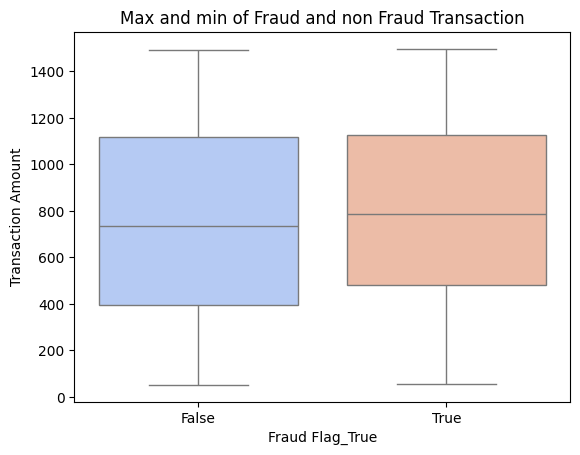

In [447]:
sns.boxplot(data= data,x = "Fraud Flag_True",y="Transaction Amount",palette="coolwarm")
plt.title("Max and min of Fraud and non Fraud Transaction")

In [448]:
fraud_amount = float(df[df["Fraud Flag"] == True ]["Transaction Amount"].sum())
nonfraud_amount = float(df[df["Fraud Flag"] == False]["Transaction Amount"].sum())
fraud_data = pd.DataFrame()

C:\Users\chira\AppData\Local\Temp\ipykernel_23116\2656245343.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


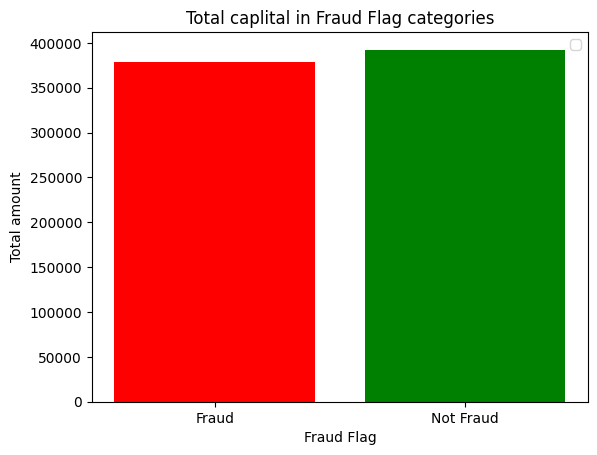

In [449]:
plt.bar(["Fraud","Not Fraud"],[fraud_amount,nonfraud_amount],color = ["red","green"])
plt.xlabel("Fraud Flag")
plt.ylabel("Total amount")
plt.title("Total caplital in Fraud Flag categories")
plt.legend()

In [450]:
correlation = df[['Transaction Amount', 'Fraud Flag']].corr()
correlation

,Transaction Amount,Fraud Flag
Transaction Amount,1.000000,0.038651
Fraud Flag,0.038651,1.000000


<Axes: >

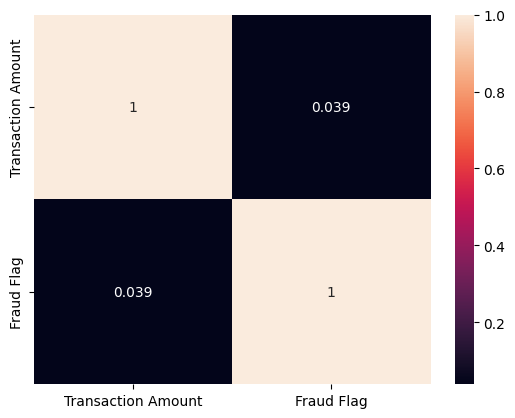

In [451]:
sns.heatmap(correlation,annot=True)

In [452]:

max_amount = df["Transaction Amount"].max()

bins = [0, 250, 500, 750, 1000, 1250, 1500]
if max_amount > 1500: 
    bins.append(max_amount + 1)
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]
df["Amount Range"] = pd.cut(df["Transaction Amount"], bins=bins, labels=labels, right=False)
fraud_rate = df.groupby("Amount Range")["Fraud Flag"].mean() * 100
fraud_rate = fraud_rate.reset_index()
fraud_rate

C:\Users\chira\AppData\Local\Temp\ipykernel_23116\750204932.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_rate = df.groupby("Amount Range")["Fraud Flag"].mean() * 100


,Amount Range,Fraud Flag
0,0-250,41.085271
1,250-500,47.513812
2,500-750,47.282609
3,750-1000,54.437870
4,1000-1250,48.913043
5,1250-1500,47.712418


<Axes: xlabel='Amount Range', ylabel='Fraud Flag'>

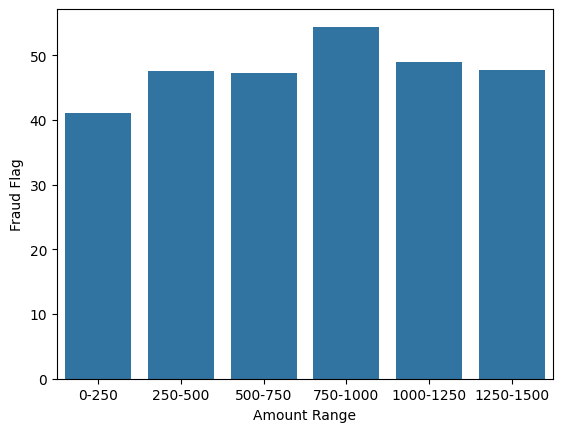

In [453]:
sns.barplot(data=fraud_rate,x="Amount Range",y="Fraud Flag")